In [42]:
using DataFrames, CSV
using PyPlot
using ScikitLearn
using ScikitLearn.CrossValidation: train_test_split
using MLDataUtils

LoadError: [91mArgumentError: Module MLDataUtils not found in current path.
Run `Pkg.add("MLDataUtils")` to install the MLDataUtils package.[39m

In [43]:
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [44]:
# define error functions

function mean_abs_err(y_output, y_true)
    n = size(y_output,1)
    sum = 0
    for i=1:n
        sum += abs.(y_output[i] - y_true[i])
    end
    return (sum+0.0)/n
end

function mean_abs_percent(y_output, y_true)
    n = size(y_output,1)
    sum = 0
    for i=1:n
        sum += abs.((y_output[i] - y_true[i])/y_true[i])
    end
    return 100*(sum+0.0)/n
end

mean_abs_percent (generic function with 1 method)

In [45]:
tap_train_2003 = readtable("TAP_train_2003.csv");
tap_train_2008 = readtable("TAP_train_2008.csv");
tap_train_2015 = readtable("TAP_train_2015.csv");

In [46]:
X_nontest_2003 = convert(Array{Float64},tap_train_2003[:,2:42]);
y_nontest_2003 = convert(Array,tap_train_2003[:,43]);

X_nontest_2008 = convert(Array{Float64},tap_train_2008[:,2:42]);
y_nontest_2008 = convert(Array,tap_train_2008[:,43]);

X_nontest_2015 = convert(Array{Float64},tap_train_2015[:,2:42]);
y_nontest_2015 = convert(Array,tap_train_2015[:,43]);

In [47]:
X_train_2003, X_validate_2003, y_train_2003, y_validate_2003 = train_test_split(X_nontest_2003, y_nontest_2003, test_size=0.25, random_state=42);
X_train_2008, X_validate_2008, y_train_2008, y_validate_2008 = train_test_split(X_nontest_2008, y_nontest_2008, test_size=0.25, random_state=42);
X_train_2015, X_validate_2015, y_train_2015, y_validate_2015 = train_test_split(X_nontest_2015, y_nontest_2015, test_size=0.25, random_state=42);

# 2015 dataset analysis

## model 1: linear regression with quadratic loss, no regularizer

In [48]:
@sk_import linear_model: LinearRegression

regr_1 = LinearRegression();
ScikitLearn.fit!(regr_1, X_train_2015, y_train_2015);
output_regr1 = ScikitLearn.predict(regr_1, X_validate_2015);

In [49]:
regr_1[:coef_]

41-element Array{Float64,1}:
    2.25308e-10
  -62.5108     
  -35.6786     
 1159.62       
  -79.798      
   29.4902     
   50.3078     
   -4.83442e-9 
   -2.70518e-9 
   85.2391     
    2.02077    
   77.9031     
 -102.652      
    ⋮          
 1061.64       
    0.0        
    0.0        
 -975.208      
 -396.607      
 -149.875      
   88.1529     
 -184.408      
    0.0        
    0.0        
   -0.0721065  
    0.0        

In [50]:
# compute errors on validation set
MAE_regr1 = mean_abs_err(output_regr1, y_validate_2015);
MAPD_regr1 = mean_abs_percent(output_regr1, y_validate_2015);
@printf "For model 1 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr1 MAPD_regr1

For model 1 on the validation set, the MAE is 429

## model 2: linear regression with quadratic loss, l2 regularizer (ridge)

In [51]:
# ridge regression with lambda parameter = lambda
lambda = 0.25
@sk_import linear_model: Ridge

regr_2 = Ridge(alpha = lambda)
ScikitLearn.fit!(regr_2, X_train_2015, y_train_2015);
output_regr2 = ScikitLearn.predict(regr_2, X_validate_2015);

In [52]:
regr_2[:coef_]

41-element Array{Float64,1}:
    0.0      
  -62.69     
  -35.6353   
 1147.33     
  -79.852    
   29.5066   
   50.3455   
    0.0      
    0.0      
   85.2515   
    2.1024   
   77.9058   
 -102.57     
    ⋮        
 1058.65     
    0.0      
    0.0      
 -965.137    
 -396.68     
 -150.258    
   86.3379   
 -182.197    
    0.0      
    0.0      
   -0.0721039
    0.0      

In [53]:
# compute errors on validation set
MAE_regr2 = mean_abs_err(output_regr2, y_validate_2015);
MAPD_regr2 = mean_abs_percent(output_regr2, y_validate_2015);
@printf "For model 2 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr2 MAPD_regr2

For model 2 on the validation set, the MAE is 429.843886 and the MAPD is 45.661897

## model 3: linear regression with quadratic loss, l1 regularizer (lasso)

In [54]:
# lasso regression with lambda parameter = lambda
lambda = 0.5
@sk_import linear_model: Lasso

regr_3 = Lasso(alpha = lambda, max_iter = 5000)
ScikitLearn.fit!(regr_3, X_train_2015, y_train_2015);
output_regr3 = ScikitLearn.predict(regr_3, X_validate_2015);

In [55]:
regr_3[:coef_]

41-element Array{Float64,1}:
    0.0      
  -27.108    
  -29.1549   
 1303.99     
 -113.72     
   -0.0      
   15.7455   
    0.0      
    0.0      
   77.1541   
   -0.0      
   70.1678   
 -102.086    
    ⋮        
  963.226    
    0.0      
    0.0      
 -629.766    
 -306.987    
   -0.0      
  123.829    
   -0.0      
    0.0      
    0.0      
   -0.0720725
    0.0      

In [56]:
# compute errors on validation set
MAE_regr3 = mean_abs_err(output_regr3, y_validate_2015);
MAPD_regr3 = mean_abs_percent(output_regr3, y_validate_2015);
@printf "For model 3 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr3 MAPD_regr3

For model 3 on the validation set, the MAE is 430.453410 and the MAPD is 45.687219

# 2008 dataset analysis

## model 1: linear regression with quadratic loss, no regularizer

In [57]:
regr_1 = LinearRegression();
ScikitLearn.fit!(regr_1, X_train_2008, y_train_2008);
output_regr1 = ScikitLearn.predict(regr_1, X_validate_2008);

In [58]:
regr_1[:coef_]

41-element Array{Float64,1}:
    2.02222e11
  398.137     
   23.1405    
    1.06432e10
   -2.66081e10
   -2.66081e10
   -2.66081e10
    1.06432e11
   -2.66081e10
   32.0855    
 -625.097     
  292.896     
 -100.144     
    ⋮         
   -1.59649e10
    0.0       
    0.0       
   -5.32162e9 
   -1.59649e10
   -1.59649e10
   -1.59649e10
   -5.32162e9 
    5.32162e10
    5.32162e10
   -0.0620518 
    0.0       

In [59]:
# compute errors on validation set
MAE_regr1 = mean_abs_err(output_regr1, y_validate_2008);
MAPD_regr1 = mean_abs_percent(output_regr1, y_validate_2008);
@printf "For model 1 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr1 MAPD_regr1

For model 1 on the validation set, the MAE is 491.674109 and the MAPD is 65.539155

## model 2: linear regression with quadratic loss, l2 regularizer (ridge)

In [60]:
regr_2 = Ridge(alpha = 0.25)
ScikitLearn.fit!(regr_2, X_train_2008, y_train_2008);
output_regr2 = ScikitLearn.predict(regr_2, X_validate_2008);

In [61]:
regr_2[:coef_]

41-element Array{Float64,1}:
  677.619    
  397.998    
   23.0993   
 1520.93     
  509.707    
  521.827    
  592.804    
 -677.619    
 -946.719    
   32.5536   
 -624.267    
  293.244    
  -99.5288   
    ⋮        
 1058.27     
    0.0      
    0.0      
 -947.721    
 -182.428    
   35.0377   
  314.375    
 -573.206    
 -621.153    
  -56.4657   
   -0.0620454
    0.0      

In [62]:
# compute errors on validation set
MAE_regr2 = mean_abs_err(output_regr2, y_validate_2008);
MAPD_regr2 = mean_abs_percent(output_regr2, y_validate_2008);
@printf "For model 2 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr2 MAPD_regr2

For model 2 on the validation set, the MAE is 491.671215 and the MAPD is 65.525595

## model 3: linear regression with quadratic loss, l1 regularizer (lasso)

In [63]:
regr_3 = Lasso(alpha = 0.5, max_iter = 5000)
ScikitLearn.fit!(regr_3, X_train_2008, y_train_2008);
output_regr3 = ScikitLearn.predict(regr_3, X_validate_2008);

In [64]:
regr_3[:coef_]

41-element Array{Float64,1}:
 2136.6      
  425.734    
   17.8321   
 2324.08     
   -0.0      
   13.6042   
   78.4929   
   -0.131895 
   -0.0      
   -0.0      
 -648.594    
  258.396    
 -126.668    
    ⋮        
  736.627    
    0.0      
    0.0      
 -244.096    
 -364.211    
 -125.53     
   91.9317   
   -0.0      
 -655.492    
    0.0      
   -0.0619818
    0.0      

In [65]:
# compute errors on validation set
MAE_regr3 = mean_abs_err(output_regr3, y_validate_2008);
MAPD_regr3 = mean_abs_percent(output_regr3, y_validate_2008);
@printf "For model 3 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr3 MAPD_regr3

For model 3 on the validation set, the MAE is 492.368404 and the MAPD is 65.333841

# 2003 dataset analysis

## model 1: linear regression with quadratic loss, no regularizer

In [66]:
regr_1 = LinearRegression();
ScikitLearn.fit!(regr_1, X_train_2003, y_train_2003);
output_regr1 = ScikitLearn.predict(regr_1, X_validate_2003);

In [67]:
regr_1[:coef_]

41-element Array{Float64,1}:
  680.757   
  419.397   
    9.89856 
 1897.24    
  409.545   
  460.22    
  491.206   
 -680.757   
 -680.214   
  146.837   
 -553.024   
  279.131   
 -292.342   
    ⋮       
 1196.51    
    0.0     
 -938.725   
 -664.874   
 -216.73    
   45.7897  
  269.64    
 -293.639   
 -521.401   
 -159.356   
   -0.061139
    0.0     

In [69]:
# compute errors on validation set
MAE_regr1 = mean_abs_err(output_regr1, y_validate_2003);
MAPD_regr1 = mean_abs_percent(output_regr1, y_validate_2003);
@printf "For model 1 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr1 MAPD_regr1

For model 1 on the validation set, the MAE is 481.456795 and the MAPD is 60.365368

## model 2: linear regression with quadratic loss, l2 regularizer (ridge)

In [72]:
regr_2 = Ridge(alpha = 0.25)
ScikitLearn.fit!(regr_2, X_train_2003, y_train_2003);
output_regr2 = ScikitLearn.predict(regr_2, X_validate_2003);

In [73]:
regr_2[:coef_]

41-element Array{Float64,1}:
  684.717    
  418.937    
    9.92364  
 1830.46     
  409.564    
  460.304    
  491.107    
 -684.717    
 -676.258    
  146.867    
 -552.668    
  279.048    
 -292.184    
    ⋮        
 1180.07     
    0.0      
 -815.326    
 -725.219    
 -220.921    
   41.1835   
  264.951    
 -289.918    
 -529.27     
 -155.446    
   -0.0611371
    0.0      

In [74]:
# compute errors on validation set
MAE_regr2 = mean_abs_err(output_regr2, y_validate_2003);
MAPD_regr2 = mean_abs_percent(output_regr2, y_validate_2003);
@printf "For model 2 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr2 MAPD_regr2

For model 2 on the validation set, the MAE is 481.474333 and the MAPD is 60.361104

## model 3: linear regression with quadratic loss, l1 regularizer (lasso)

In [75]:
regr_3 = Lasso(alpha = 0.5, max_iter = 5000)
ScikitLearn.fit!(regr_3, X_train_2003, y_train_2003);
output_regr3 = ScikitLearn.predict(regr_3, X_validate_2003);

In [76]:
regr_3[:coef_]

41-element Array{Float64,1}:
 2098.14     
  328.634    
    8.50855  
 2578.17     
    0.0      
   52.2971   
   77.2108   
   -7.73429  
 -986.888    
    0.0      
 -690.819    
  127.502    
 -434.147    
    ⋮        
  710.798    
    0.0      
   -0.0      
   -0.0      
 -366.277    
  -84.0116   
   83.3538   
    0.0      
 -652.858    
   -0.0      
   -0.0610943
    0.0      

In [77]:
# compute errors on validation set
MAE_regr3 = mean_abs_err(output_regr3, y_validate_2003);
MAPD_regr3 = mean_abs_percent(output_regr3, y_validate_2003);
@printf "For model 3 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr3 MAPD_regr3

For model 3 on the validation set, the MAE is 482.459289 and the MAPD is 60.349483

# 2000 - 2015 Dataset Analysis

## model 1: linear regression with quadratic loss, no regularizer

In [78]:
tap_train = readtable("TAP_train.csv");

In [79]:
X_nontest = convert(Array{Float64},tap_train[:,1:42]);
y_nontest = convert(Array,tap_train[:,43]);

In [80]:
X_train, X_validate, y_train, y_validate = train_test_split(X_nontest, y_nontest, test_size=0.25, random_state=42);

In [81]:
regr_1 = LinearRegression();
ScikitLearn.fit!(regr_1, X_train, y_train);
output_regr1 = ScikitLearn.predict(regr_1, X_validate);

In [82]:
regr_1[:coef_]

42-element Array{Float64,1}:
    31.2125   
  1280.1      
   340.463    
     5.79992  
  1780.41     
    -0.0630094
   253.482    
   308.467    
   357.934    
   205.021    
 -1124.9      
    74.956    
  -409.045    
     ⋮        
   846.251    
  1299.74     
  -512.468    
  -665.592    
  -422.293    
  -133.944    
    32.081    
   318.299    
  -180.057    
  -829.093    
  -451.01     
     0.0      

In [83]:
# compute errors on validation set
MAE_regr1 = mean_abs_err(output_regr1, y_validate);
MAPD_regr1 = mean_abs_percent(output_regr1, y_validate);
@printf "For model 1 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr1 MAPD_regr1

For model 1 on the validation set, the MAE is 510.644185 and the MAPD is 62.607305

## model 2: linear regression with quadratic loss, l2 regularizer (ridge)

In [90]:
regr_2 = Ridge(alpha = 0.25)
ScikitLearn.fit!(regr_2, X_train, y_train);
output_regr2 = ScikitLearn.predict(regr_2, X_validate);

In [91]:
regr_2[:coef_]

42-element Array{Float64,1}:
    31.2138   
  1228.44     
   340.434    
     5.79988  
  1781.89     
    -0.0630091
   270.116    
   325.104    
   374.565    
   136.334    
 -1106.12     
    74.9615   
  -409.024    
     ⋮        
   837.655    
  1291.14     
  -507.895    
  -660.747    
  -428.663    
  -141.01     
    24.9893   
   311.201    
  -184.582    
  -804.034    
  -424.406    
     0.0      

In [92]:
# compute errors on validation set
MAE_regr2 = mean_abs_err(output_regr2, y_validate);
MAPD_regr2 = mean_abs_percent(output_regr2, y_validate);
@printf "For model 2 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr2 MAPD_regr2

For model 2 on the validation set, the MAE is 510.645113 and the MAPD is 62.606834

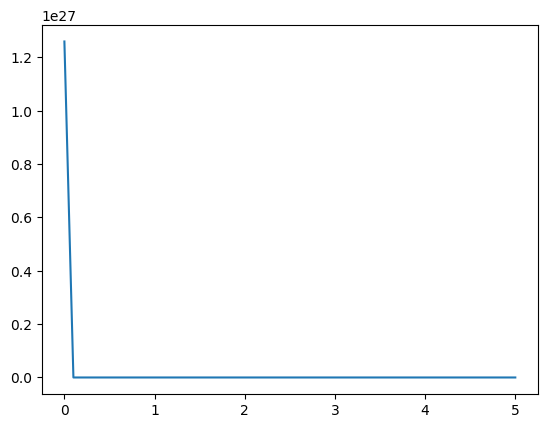

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13203cfd0>

In [106]:
error = Float64[]
λs = 0:.1:5
for λ in λs
    regr_2 = Ridge(alpha = λ)
    ScikitLearn.fit!(regr_2, X_train, y_train)
    output_regr2 = ScikitLearn.predict(regr_2, X_validate)
    w = regr_2[:coef_]
    push!(error, sum((y_validate - X_validate*w).^2))
end
plot(λs, error)

## model 3: linear regression with quadratic loss, l1 regularizer (lasso)

In [94]:
regr_3 = Lasso(alpha = 0.5, max_iter = 8000)
ScikitLearn.fit!(regr_3, X_train, y_train);
output_regr3 = ScikitLearn.predict(regr_3, X_validate);

In [97]:
regr_3[:coef_][1:15]

15-element Array{Float64,1}:
   31.3622  
 2054.98    
  313.331   
    5.37362 
 2236.69    
   -0.062957
   -0.0     
   57.7729  
  101.94    
  -32.5509  
 -928.712   
   -0.0     
 -475.12    
  111.171   
 -265.439   

In [98]:
regr_3[:coef_][16:30]

15-element Array{Float64,1}:
    6.24246
   -0.0    
   99.0109 
  -67.9825 
    0.0    
   20.716  
   -0.0    
   -4.36255
   -0.0    
   38.3471 
  423.183  
 -315.077  
    0.0    
  258.515  
    0.0    

In [99]:
regr_3[:coef_][31:42]

12-element Array{Float64,1}:
  516.756
  971.968
   -0.0  
   -0.0  
   -0.0  
 -416.492
 -229.673
    0.0  
    0.0  
 -371.629
   -0.0  
    0.0  

In [96]:
# compute errors on validation set
MAE_regr3 = mean_abs_err(output_regr3, y_validate);
MAPD_regr3 = mean_abs_percent(output_regr3, y_validate);
@printf "For model 3 on the validation set, the MAE is %f and the MAPD is %f" MAE_regr3 MAPD_regr3

For model 3 on the validation set, the MAE is 511.389105 and the MAPD is 62.485278

In [ ]:
error = Float64[]
λs = 0:.1:5
for λ in λs
    regr_2 = Lasso(alpha = λ, max_iter = 8000)
    ScikitLearn.fit!(regr_2, X_train, y_train)
    output_regr2 = ScikitLearn.predict(regr_2, X_validate)
    w = regr_2[:coef_]
    push!(error, sum((y_validate - X_validate*w).^2))
end
plot(λs, error)